In [1]:
import pandas as pd

In [8]:
week1 = pd.read_csv("Restaurant - Week 1 Sales.csv")
week2 = pd.read_csv("Restaurant - Week 2 Sales.csv")
customers = pd.read_csv("Restaurant - Customers.csv")
foods = pd.read_csv("Restaurant - Foods.csv")

### The __pd.concat()__ method

- This method is used to combine two or more dataFrames
- Its first param is a list of the DFs that you want to combine
- It has a _ignore_index_ param that you can use to reset the index to make everything uniform(default: False)
- To be able to differentiate between the two combined DFs, we use a param called _keys_ . Note: when you do this, you do not need to use _ignore_index_

In [9]:
pd.concat([week1,week2], ignore_index= True).tail()

,Customer ID,Food ID
495,783,10
496,556,10
497,547,9
498,252,9
499,249,6


In [15]:
pd.concat([week1,week2], keys=["W1", "W2"]).head()
#now we know where the data comes from

Customer ID  Food ID
W1 0          537        9
   1           97        4
   2          658        1
   3          202        2
   4          155        9

### The .append() Method

The only difference between this method and pd.concat() method is that you call .append() method on the DF object.
However, you call .concat() method on the pd object itself

In [17]:
week2.append(week1, ignore_index= True).head()

,Customer ID,Food ID
0,688,10
1,813,7
2,495,10
3,189,5
4,267,3


![Sql Joins](http://1.bp.blogspot.com/-E3Hj3JNrCuM/T-gRz-tToWI/AAAAAAAAAOI/Azi7Hr7IWV0/s1600/SQL+Joinsjpg.jpg)

## Inner Joins

In [29]:
week1.merge(right=week2, how="inner", on="Customer ID", suffixes= ["-Week1", "-Week2"]).head()

,Customer ID,Food ID-Week1,Food ID-Week2
0,537,9,5
1,155,9,3
2,155,1,3
3,503,5,8
4,503,5,9


See how we joined both DataFrames:
- we used the __.merge()__ method
- the first param: __right__ which indicates which Df you want to merge with
- the second param: __how__ which sets what kind of join you want i.e. inner,outer e.t.c.
- the third param:  __on__ which means on what common field do you want to merge both DFs (this is the _foreign_key in SQL)
- the __suffixes__ param is an indicator for different fields when the DFs are joined. To differentiate.

In [27]:
mask = week1["Customer ID"] == 233
week1[mask]

,Customer ID,Food ID
94,233,3


In [28]:
mask1 = week2["Customer ID"] == 233
week2[mask1]

,Customer ID,Food ID
238,233,3


## Outter Joins

In [34]:
week1.merge(week2, how="outer", on = "Customer ID", suffixes= ["-Week1", "-Week2"], indicator= True).head()

,Customer ID,Food ID-Week1,Food ID-Week2,_merge
0,537,9.0,5.0,both
1,97,4.0,NaN,left_only
2,658,1.0,NaN,left_only
3,202,2.0,NaN,left_only
4,155,9.0,3.0,both


- outter joins combine data that are common to both DFs and inserts NaN to data that are not common
- as opposed to inner joins that only care about the intersections i.e. data that are only present in both DFs
- we can also add an __indicator__ param field that will give us a visiual idea of the type of merge

In [32]:
week1.head(3)

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1


In [33]:
week2.head(3)

,Customer ID,Food ID
0,688,10
1,813,7
2,495,10


In [43]:
merged = week1.merge(week2, how="outer", on = "Customer ID", suffixes= ["-Week1", "-Week2"], indicator= True)

In [45]:
mask1 = merged["_merge"] == "both"
mask2 = merged["_merge"] == "left_only"
mask3 = merged["_merge"] == "right_only"

merged[~mask1]

,Customer ID,Food ID-Week1,Food ID-Week2,_merge
1,97,4.0,NaN,left_only
2,658,1.0,NaN,left_only
3,202,2.0,NaN,left_only
6,213,8.0,NaN,left_only
7,600,1.0,NaN,left_only
10,71,3.0,NaN,left_only
11,71,8.0,NaN,left_only
12,174,3.0,NaN,left_only
13,961,9.0,NaN,left_only
14,966,5.0,NaN,left_only


## Left Joins

- left join is like vlookup in excel
- it takes into consideration all data that are in the left DF and also data in the right DF (that are also present in the left DF) that we want to look up extra info on


In [51]:
week1.head(3)

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1


In [47]:
foods.head(3)

,Food ID,Food Item,Price
0,1,Sushi,3.99
1,2,Burrito,9.99
2,3,Taco,2.99


In [53]:
week1.merge(foods, how="left", on = "Food ID").head()

,Customer ID,Food ID,Food Item,Price
0,537,9,Donut,0.99
1,97,4,Quesadilla,4.25
2,658,1,Sushi,3.99
3,202,2,Burrito,9.99
4,155,9,Donut,0.99


See how it merged the data sets: <br>
- the right DF is the foods data that has all the info about different food IDs

## The left_on and right_on Parameters

- We use these params when the two DFs to be merged do not have a common field label to merge on
- We have to specify on each DF which fields to do the merge
- You can drop the duplicate field during the merger

In [54]:
week2.head()

,Customer ID,Food ID
0,688,10
1,813,7
2,495,10
3,189,5
4,267,3


In [55]:
customers.head()

,ID,First Name,Last Name,Gender,Company,Occupation
0,1,Joseph,Perkins,Male,Dynazzy,Community Outreach Specialist
1,2,Jennifer,Alvarez,Female,DabZ,Senior Quality Engineer
2,3,Roger,Black,Male,Tagfeed,Account Executive
3,4,Steven,Evans,Male,Fatz,Registered Nurse
4,5,Judy,Morrison,Female,Demivee,Legal Assistant


In [71]:
 "Roger" in list(customers["First Name"])
#This is how you do a quick check if a string is in a Series - You must encapsulate the Series with a List
#You do not need to do this with numbers(int)

True

In [77]:
week2.merge(customers, how="left", left_on= "Customer ID", right_on= "ID").head()

,Customer ID,Food ID,ID,First Name,Last Name,Gender,Company,Occupation
0,688,10,688,Carl,Williamson,Male,Thoughtmix,Graphic Designer
1,813,7,813,Johnny,Walker,Male,Kayveo,Developer II
2,495,10,495,Deborah,Little,Female,Babbleblab,VP Accounting
3,189,5,189,Roger,Gordon,Male,Skilith,Operator
4,267,3,267,Matthew,Wood,Male,Agimba,Product Engineer


From the above see how we specified the left_on and right_on fields. However, see how "Customer ID" and "ID" fields are the same.<br> You can drop one of them during the merger

In [78]:
week2.merge(customers, how="left", left_on= "Customer ID", right_on= "ID").drop("ID", axis = "columns").head()

,Customer ID,Food ID,First Name,Last Name,Gender,Company,Occupation
0,688,10,Carl,Williamson,Male,Thoughtmix,Graphic Designer
1,813,7,Johnny,Walker,Male,Kayveo,Developer II
2,495,10,Deborah,Little,Female,Babbleblab,VP Accounting
3,189,5,Roger,Gordon,Male,Skilith,Operator
4,267,3,Matthew,Wood,Male,Agimba,Product Engineer


## Merging by Indexes with left_index and right_index parameters

In [83]:
foods.head(3)

,Food Item,Price
Food ID,,
1,Sushi,3.99
2,Burrito,9.99
3,Taco,2.99


In [84]:
customers.set_index("ID", inplace= True)

In [86]:
customers.head(3)

,First Name,Last Name,Gender,Company,Occupation
ID,,,,,
1,Joseph,Perkins,Male,Dynazzy,Community Outreach Specialist
2,Jennifer,Alvarez,Female,DabZ,Senior Quality Engineer
3,Roger,Black,Male,Tagfeed,Account Executive


In [87]:
week1.head(2)

,Customer ID,Food ID
0,537,9
1,97,4


In [90]:
sales = week1.merge(customers, how="left", left_on='Customer ID', right_index= True)
sales.head()

,Customer ID,Food ID,First Name,Last Name,Gender,Company,Occupation
0,537,9,Cheryl,Carroll,Female,Zoombeat,Registered Nurse
1,97,4,Amanda,Watkins,Female,Ozu,Account Coordinator
2,658,1,Patrick,Webb,Male,Browsebug,Community Outreach Specialist
3,202,2,Louis,Campbell,Male,Rhynoodle,Account Representative III
4,155,9,Carolyn,Diaz,Female,Gigazoom,Database Administrator III


- see how we merged both DFs on the left's "Customer ID" label and the right's index values
- one advantage of doing this is that we do not get duplicate fields - where we have to drop a field during merger

In [91]:
#Now to get the Food data by their IDs , we will merge the above DF with the foods DF
sales.merge(foods, how="left", left_on="Food ID", right_index=True).head()

,Customer ID,Food ID,First Name,Last Name,Gender,Company,Occupation,Food Item,Price
0,537,9,Cheryl,Carroll,Female,Zoombeat,Registered Nurse,Donut,0.99
1,97,4,Amanda,Watkins,Female,Ozu,Account Coordinator,Quesadilla,4.25
2,658,1,Patrick,Webb,Male,Browsebug,Community Outreach Specialist,Sushi,3.99
3,202,2,Louis,Campbell,Male,Rhynoodle,Account Representative III,Burrito,9.99
4,155,9,Carolyn,Diaz,Female,Gigazoom,Database Administrator III,Donut,0.99


 - You can also use .join() method when you want to merge to DFs with similar index fields
 - You can also do a pd.merge() for merging operations

# Practice with Live Data - Summit

In [11]:
reps = pd.read_excel("SalesReps.xlsx")

In [12]:
reps.shape

(222, 10)

In [13]:
reps.head(3)

,Location,Period,SLS,SLSRP NAME,SALES,COST,PROFIT,PFT %,ORDER,AVGOR
0,1,12,5,STRATIFICA,NaN,NaN,NaN,NaN,NaN,NaN
1,1,12,106,DORMANT LO,42467.85,36671.41,5796.44,13.65,44.0,965.18
2,1,12,111,DORMANT LO,15312.95,13763.90,1549.05,10.12,20.0,765.65


In [15]:
reps.nunique()

Location        3
Period          1
SLS           127
SLSRP NAME     98
SALES         155
COST          155
PROFIT        155
PFT %         146
ORDER          89
AVGOR         152
dtype: int64

In [32]:
#mask100 = (100 >= reps["SLS"]) & (reps["SLS"] <= 199)
#mask500 = 500 >= reps["SLS"] <= 599
salesReps = reps[(reps["SLS"] >= 500) & (reps["SLS"] <= 599)].dropna()

In [36]:
salesReps.head(3)

,Location,Period,SLS,SLSRP NAME,SALES,COST,PROFIT,PFT %,ORDER,AVGOR
33,1,12,506,RYAN IRWIN,125120.13,106614.50,18505.63,14.79,124.0,1009.03
34,1,12,508,MICHAEL DA,145300.46,126236.30,19064.16,13.12,107.0,1357.95
35,1,12,511,RHYS LLOYD,148565.73,123527.03,25038.70,16.85,121.0,1227.82


In [55]:
salesReps["SLSRP NAME"] = salesReps["SLSRP NAME"].str.title()

In [56]:
loc = salesReps.groupby("Location")

In [57]:
loc.first()

,Period,SLS,SLSRP NAME,SALES,COST,PROFIT,PFT %,ORDER,AVGOR
Location,,,,,,,,,
1,12,506,Ryan Irwin,125120.13,106614.50,18505.63,14.79,124.0,1009.03
2,12,540,Inside Sal,1869.61,1502.62,366.99,19.63,3.0,623.20
3,12,517,Joanne Dec,135481.81,113793.75,21688.06,16.01,86.0,1575.37


In [66]:
loc["SALES"].min()

Location
1     785.67
2    1869.61
3     555.43
Name: SALES, dtype: float64

In [60]:
loc.min()

,Period,SLS,SLSRP NAME,SALES,COST,PROFIT,PFT %,ORDER,AVGOR
Location,,,,,,,,,
1,12,506,Aron Leves,785.67,662.76,122.91,13.07,1.0,653.69
2,12,540,Channing N,1869.61,1502.62,366.99,12.26,2.0,623.20
3,12,517,Channing N,555.43,483.44,71.99,12.79,1.0,405.49


In [67]:
salesYear = pd.read_excel("sum_sales.xlsx")

In [68]:
salesYear.shape

(2774, 10)

In [69]:
salesYear.head(3)

,Location,Period,SLS,SLSRP NAME,SALES,COST,PROFIT,PFT %,ORDER,AVGOR
0,1,1,5,STRATIFICA,NaN,NaN,NaN,NaN,1,NaN
1,1,1,111,RHYS LLOYD,9246.7,8274.79,971.91,10.51,9,1027.41
2,1,1,114,PAUL CRELL,106257,91695.4,14561.45,13.7,80,1328.21


In [74]:
salesYear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2115 entries, 1 to 2773
Data columns (total 10 columns):
Location      2115 non-null int64
Period        2115 non-null int64
SLS           2115 non-null int64
SLSRP NAME    2115 non-null object
SALES         2115 non-null object
COST          2115 non-null object
PROFIT        2115 non-null float64
PFT %         2115 non-null object
ORDER         2115 non-null object
AVGOR         2115 non-null float64
dtypes: float64(2), int64(3), object(5)
memory usage: 181.8+ KB


In [73]:
salesYear.dropna(how="any", inplace=True)

In [75]:
#reps[(reps["SLS"] >= 500) & (reps["SLS"] <= 599)]
newReps = salesYear[(salesYear["SLS"] >= 500) & (salesYear["SLS"] <= 599)]

In [76]:
newReps.shape

(521, 10)

In [78]:
newReps.nunique()

Location        3
Period         13
SLS            41
SLSRP NAME     48
SALES         521
COST          521
PROFIT        521
PFT %         402
ORDER         162
AVGOR         520
dtype: int64

In [80]:
repGroup = newReps.groupby("SLSRP NAME")

In [89]:
Aron = repGroup.get_group("ARON LEVES")
Aron.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 31 to 945
Data columns (total 10 columns):
Location      13 non-null int64
Period        13 non-null int64
SLS           13 non-null int64
SLSRP NAME    13 non-null object
SALES         13 non-null object
COST          13 non-null object
PROFIT        13 non-null float64
PFT %         13 non-null object
ORDER         13 non-null object
AVGOR         13 non-null float64
dtypes: float64(2), int64(3), object(5)
memory usage: 1.1+ KB


In [90]:
Aron["SALES"] = Aron["SALES"].astype("int")
Aron["COST"] = Aron["COST"].astype("int")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [92]:
Aron.nlargest(5,"SALES")

,Location,Period,SLS,SLSRP NAME,SALES,COST,PROFIT,PFT %,ORDER,AVGOR
553,1,8,513,ARON LEVES,181778,155779,25999.27,14.3,115,1580.68
476,1,7,513,ARON LEVES,168883,144593,24290.19,14.38,120,1407.36
630,1,9,513,ARON LEVES,165990,142261,23729.26,14.3,111,1495.41
400,1,6,513,ARON LEVES,155787,133117,22669.61,14.55,114,1366.56
324,1,5,513,ARON LEVES,153317,130234,23083.05,15.06,116,1321.70


In [106]:
maxSales = repGroup.max()[["Location", "SLS", "Period", "SALES"]]

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

,Location,SLS,Period,SALES
SLSRP NAME,,,,
ARON LEVES,1,513,13,181778.74
BO DING,3,581,5,4568.77
BRIAN GRAH,3,599,5,49982.69


In [119]:
SR = list(maxSales.index)

In [131]:
maxSales.head()

,Location,Sls,Period,Sales,Salesreps
SLSRP NAME,,,,,
ARON LEVES,1,513,13,181778.74,Aron Leves
BO DING,3,581,5,4568.77,Bo Ding
BRIAN GRAH,3,599,5,49982.69,Brian Grah
CHANNING N,3,575,13,374035.62,Channing N
CURVE LAKE,3,599,8,1234.56,Curve Lake


In [127]:
maxSales.columns = maxSales.columns.str.title()

In [130]:
maxSales["Salesreps"] = maxSales["Salesreps"].str.title()

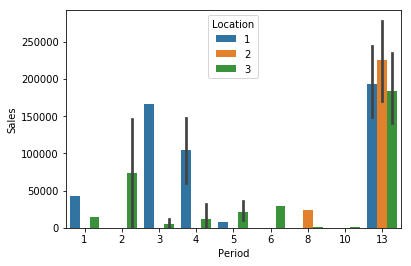

In [144]:
sns.barplot(x="Period", y="Sales", data=maxSales, hue = "Location")

In [145]:
mam = repGroup.get_group("MAMDOUH AB")

In [146]:
mam.nunique()

AVGOR       21
COST        21
Location     2
ORDER       16
PFT %       21
PROFIT      21
Period      13
SALES       21
SLS          2
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


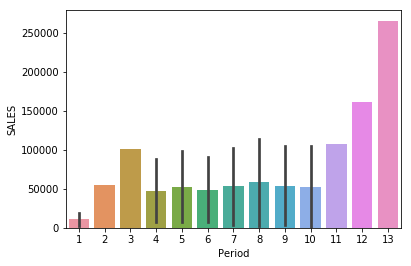

In [148]:
sns.barplot(x="Period", y="SALES", data=mam)

In [150]:
newReps.columns = newReps.columns.str.title()

In [152]:
newReps["Slsrp Name"] = newReps["Slsrp Name"].str.title()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [153]:
newReps.head(3)

,Location,Period,Sls,Slsrp Name,Sales,Cost,Profit,Pft %,Order,Avgor
28,1,1,506,Ryan Irwin,56971.7,44910.1,12061.62,21.17,51,1117.09
29,1,1,508,Michael Da,77551.7,66643.7,10908.07,14.07,65,1193.10
30,1,1,511,Rhys Lloyd,99699,84334.3,15364.66,15.41,102,977.44


In [154]:
newReps.nunique()

Location        3
Period         13
Sls            41
Slsrp Name     48
Sales         521
Cost          521
Profit        521
Pft %         402
Order         162
Avgor         520
dtype: int64

In [159]:
locGroup = newReps.groupby(["Location", "Period"])

In [160]:
locGroup.size()

Location  Period
1         1         17
          2         16
          3         17
          4         16
          5         15
          6         14
          7         12
          8         12
          9         14
          10        15
          11        14
          12        14
          13        14
2         1         15
          2         14
          3         14
          4         13
          5         11
          6         10
          7         11
          8         11
          9         10
          10        10
          11        10
          12        11
          13        12
3         1         13
          2         19
          3         19
          4         17
          5         18
          6         13
          7         12
          8         12
          9         10
          10        13
          11        11
          12        11
          13        11
dtype: int64

In [169]:
loc1P1 = locGroup.get_group((1,1))

In [170]:
loc1P1.head()

,Avgor,Cost,Order,Pft %,Profit,Sales,Sls,Slsrp Name
28,1117.09,44910.1,51,21.17,12061.62,56971.7,506,Ryan Irwin
29,1193.10,66643.7,65,14.07,10908.07,77551.7,508,Michael Da
30,977.44,84334.3,102,15.41,15364.66,99699,511,Rhys Lloyd
31,1419.95,80697,68,16.43,15859.70,96556.7,513,Aron Leves
32,1506.77,122457,97,16.22,23699.95,146157,514,Paul Crell


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

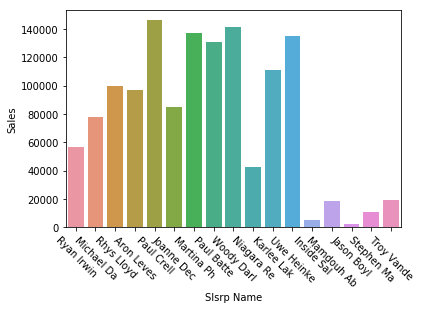

In [194]:
ax = sns.barplot(x="Slsrp Name", y="Sales", data=loc1P1)
plt.xticks(rotation=-45)